In [1]:
# pip install mlxtend  

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
sns.set()
from numpy import where
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [2]:
nd = pd.read_csv("data.csv")
numeric_data = nd.drop(columns="Unnamed: 32")

In [3]:
numeric_data['diagnosis_num'] =  numeric_data['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
numeric_data.columns
numeric_data = numeric_data[['id', 'diagnosis', 'diagnosis_num', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]



In [4]:
numeric_only = numeric_data.drop('diagnosis', axis=1)
numeric_df = pd.DataFrame(numeric_only)
numeric_df.head()

,id,diagnosis_num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
target = numeric_df['diagnosis_num']
data = numeric_df.drop('diagnosis_num', axis=1)
features = data.columns

# Features Selection Visualization

In [6]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=31)
fit = bestfeatures.fit(data, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print("==== 10 First Features ====")
print(featureScores.nlargest(10,'Score'))
print("\n==== 10 last Features ====")
print(featureScores.nsmallest(10,'Score'))

==== 10 First Features ====
                 Feature       Score
28  concave points_worst  964.385393
23       perimeter_worst  897.944219
8    concave points_mean  861.676020
21          radius_worst  860.781707
3         perimeter_mean  697.235272
24            area_worst  661.600206
1            radius_mean  646.981021
4              area_mean  573.060747
7         concavity_mean  533.793126
27       concavity_worst  436.691939

==== 10 last Features ====
                    Feature      Score
19              symmetry_se   0.024117
12               texture_se   0.039095
10   fractal_dimension_mean   0.093459
0                        id   0.898150
15            smoothness_se   2.557968
20     fractal_dimension_se   3.468275
17             concavity_se  39.014482
16           compactness_se  53.247339
30  fractal_dimension_worst  66.443961
9             symmetry_mean  69.527444


In [7]:
#TOP 10 correlated features
top_features = numeric_data[["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", 
                             "perimeter_mean", "area_worst", "radius_mean", "area_mean", "concavity_mean", 
                             "concavity_worst"]]
t_lables = top_features.columns.values

In [8]:
# Last 10 correlated features
last_features = numeric_data[["symmetry_mean", "fractal_dimension_worst", "compactness_se", "concavity_se", 
                              "fractal_dimension_se", "smoothness_se", "id", "fractal_dimension_mean", "texture_se",
                              "symmetry_se" ]]
l_lables = last_features.columns.values

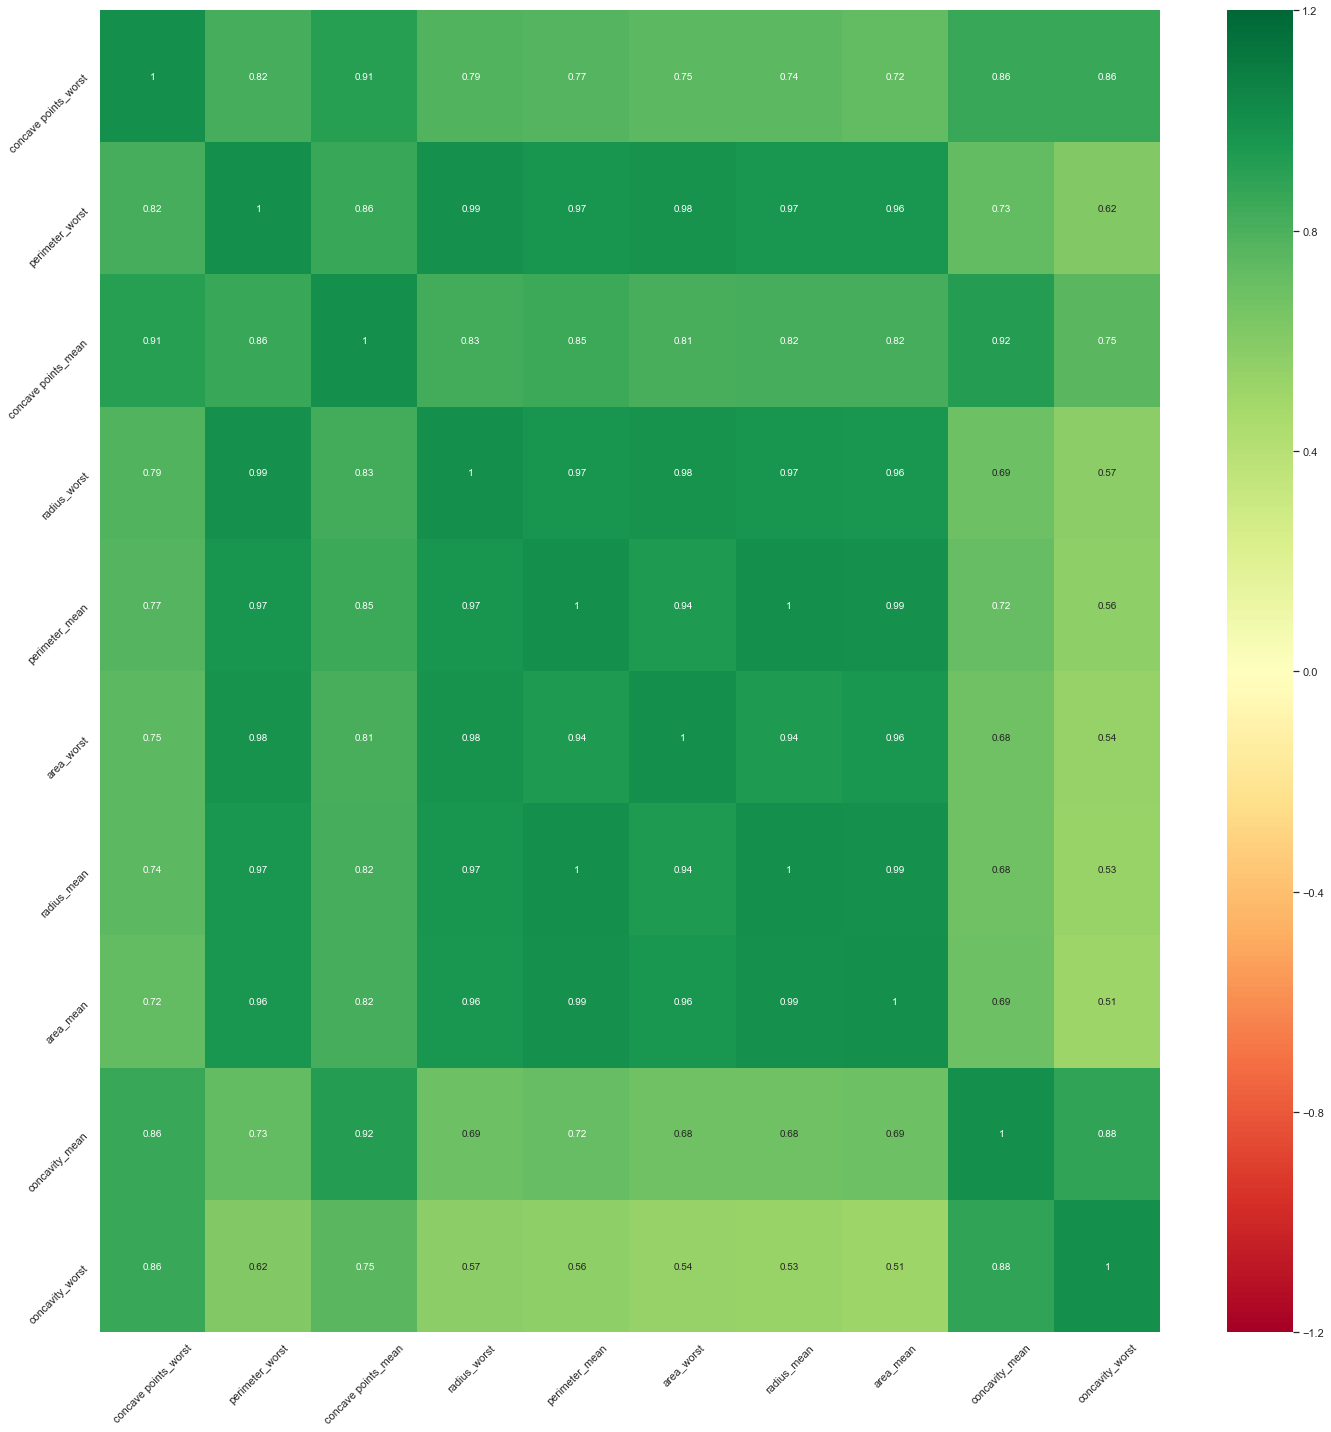

In [9]:
corrmat = top_features.corr()
top_corr_features = corrmat.index
fig = plt.figure(figsize=(20,20))
g=sns.heatmap(top_features[top_corr_features].corr(),annot=True,cmap="RdYlGn", vmin=-1.2, vmax=1.2)
g.set_ylim(10, 0)
g.set_xticklabels(t_lables, rotation =45)
g.set_yticklabels(t_lables, rotation =45)

#Features that don't correlate: 
#ID, texture_mean, texture_se, smoothness_se, fractal_dimension_se, fractal_dimension_mean 
plt.tight_layout()
fig.savefig("images/best_features_correlation.png")
plt.show()

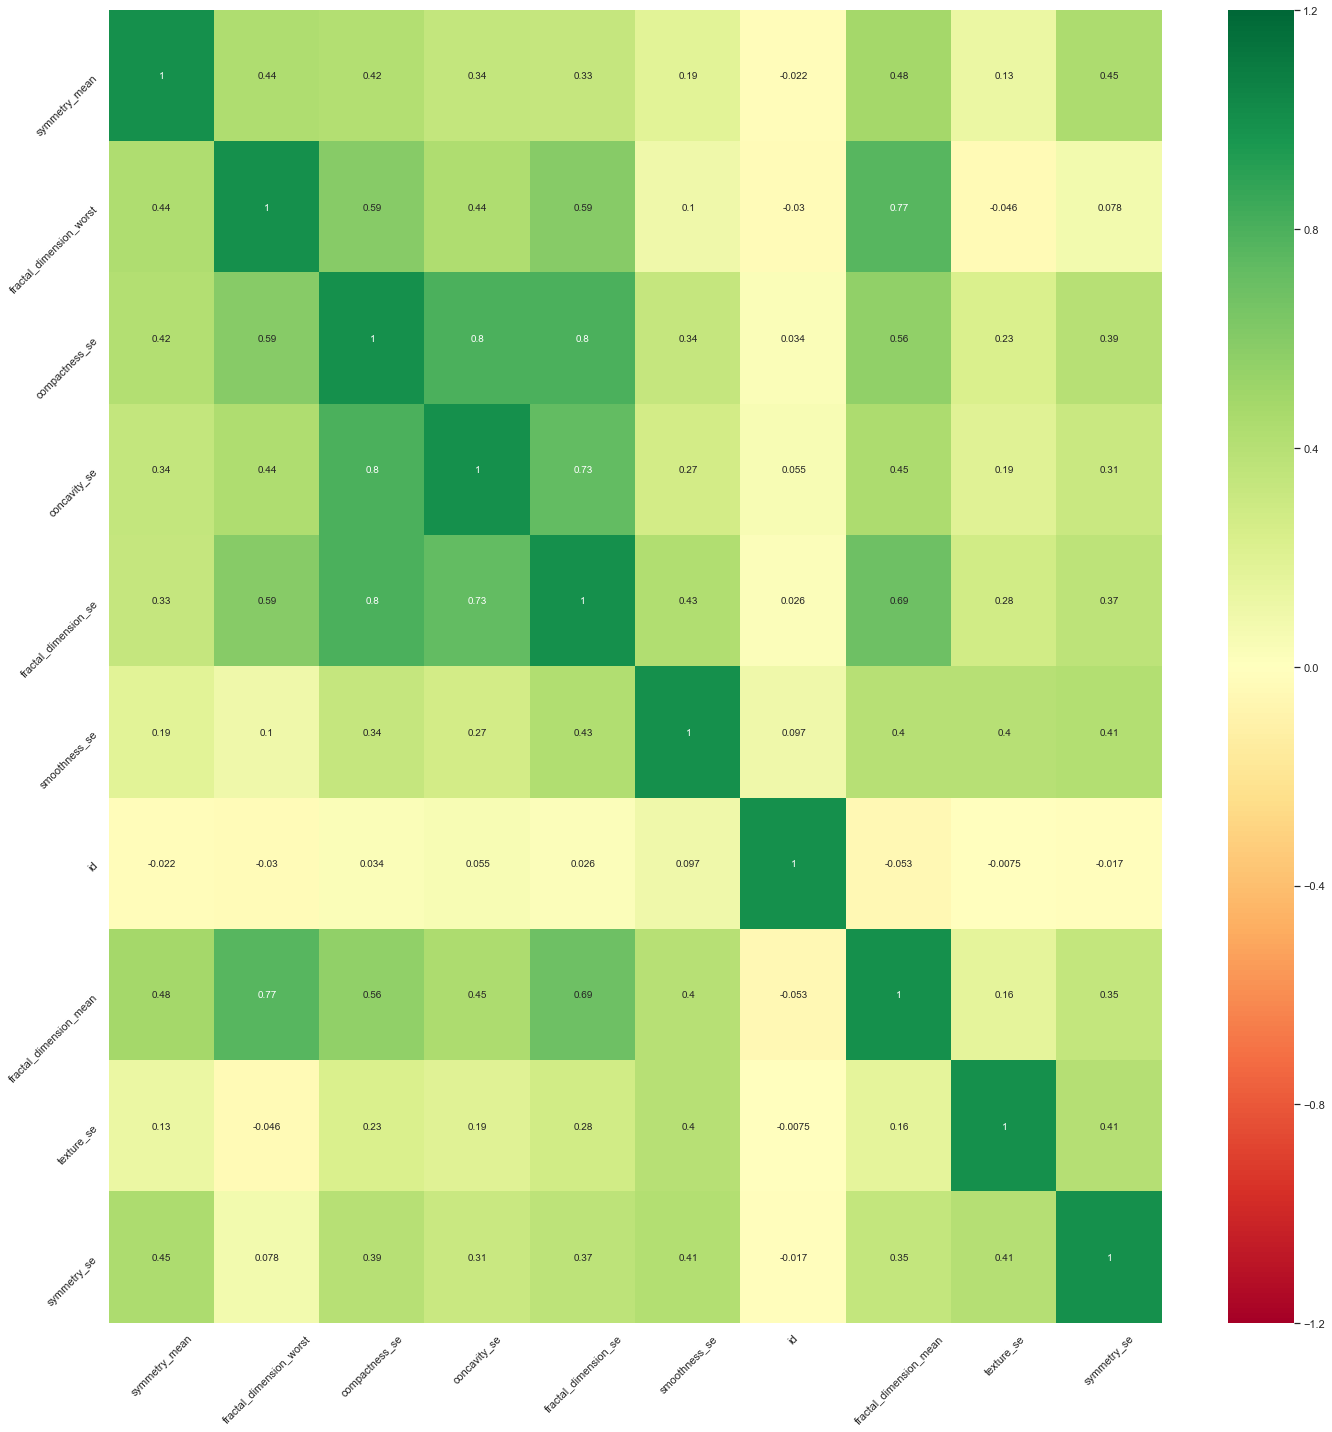

In [10]:
corrmat = last_features.corr()
last_corr_features = corrmat.index
fig = plt.figure(figsize=(20,20))
g=sns.heatmap(last_features[last_corr_features].corr(),annot=True,cmap="RdYlGn",  vmin=-1.2, vmax=1.2)
g.set_ylim(10, 0)
g.set_xticklabels(l_lables, rotation =45)
g.set_yticklabels(l_lables, rotation =45)
plt.tight_layout()
fig.savefig("images/worst_features_correlation.png")
plt.show()

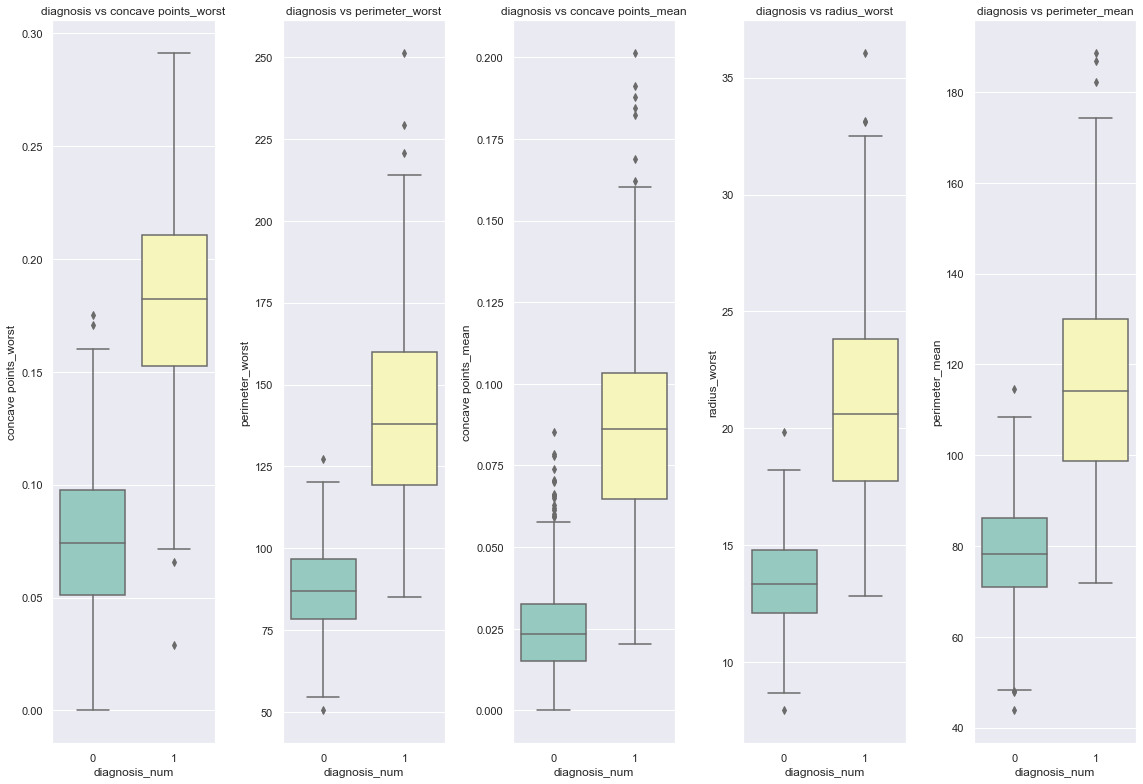

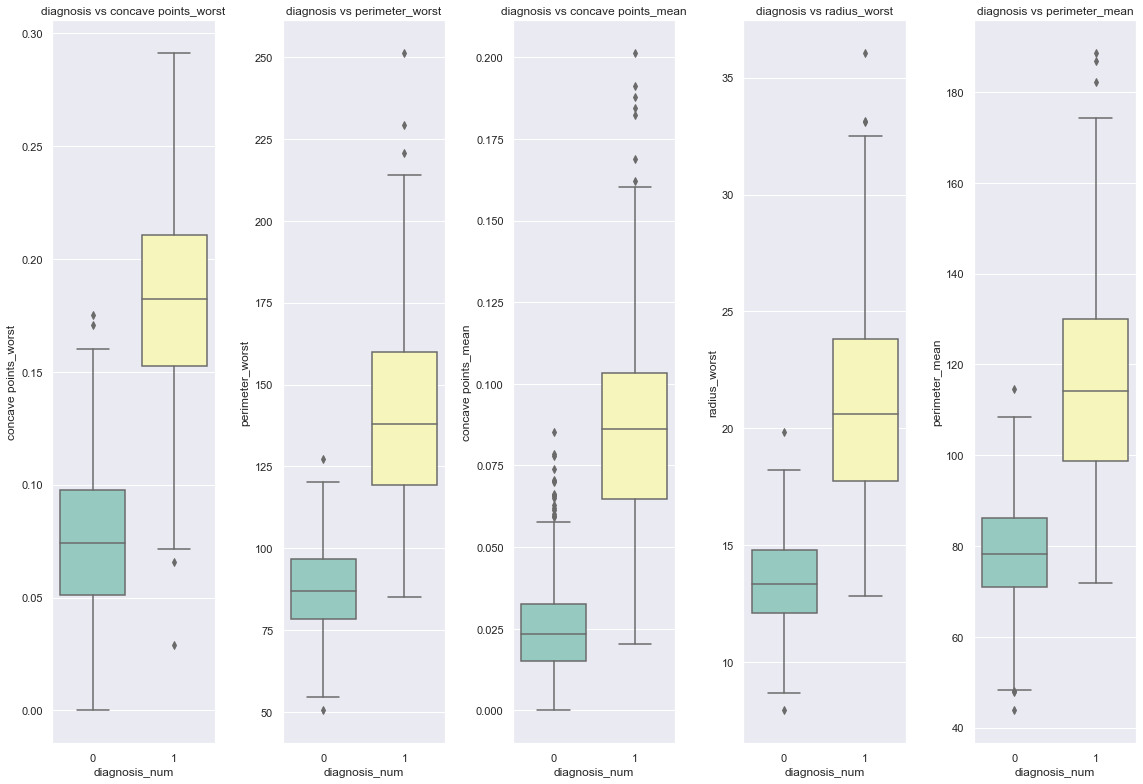

In [11]:
# Best Features vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))
axis_n = [axis1,axis2,axis3, axis4, axis5]
for feature, axis in zip(top_features[:4], axis_n):
    sns.boxplot(x="diagnosis_num", y=feature, data=numeric_df, ax=axis, palette="Set3")
    axis.set_title(f"diagnosis vs {feature}")
fig.tight_layout() 
fig.savefig("images/best_features_vs_diagnosis1.png")
#==================#

fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))
axis_n = [axis1,axis2,axis3, axis4, axis5]
for feature, axis in zip(top_features[5:], axis_n):
    sns.boxplot(x="diagnosis_num", y=feature, data=numeric_df, ax=axis,palette="Set3")
    axis.set_title(f"diagnosis vs {feature}")
fig.tight_layout()
fig.savefig("images/best_features_vs_diagnosis2.png")

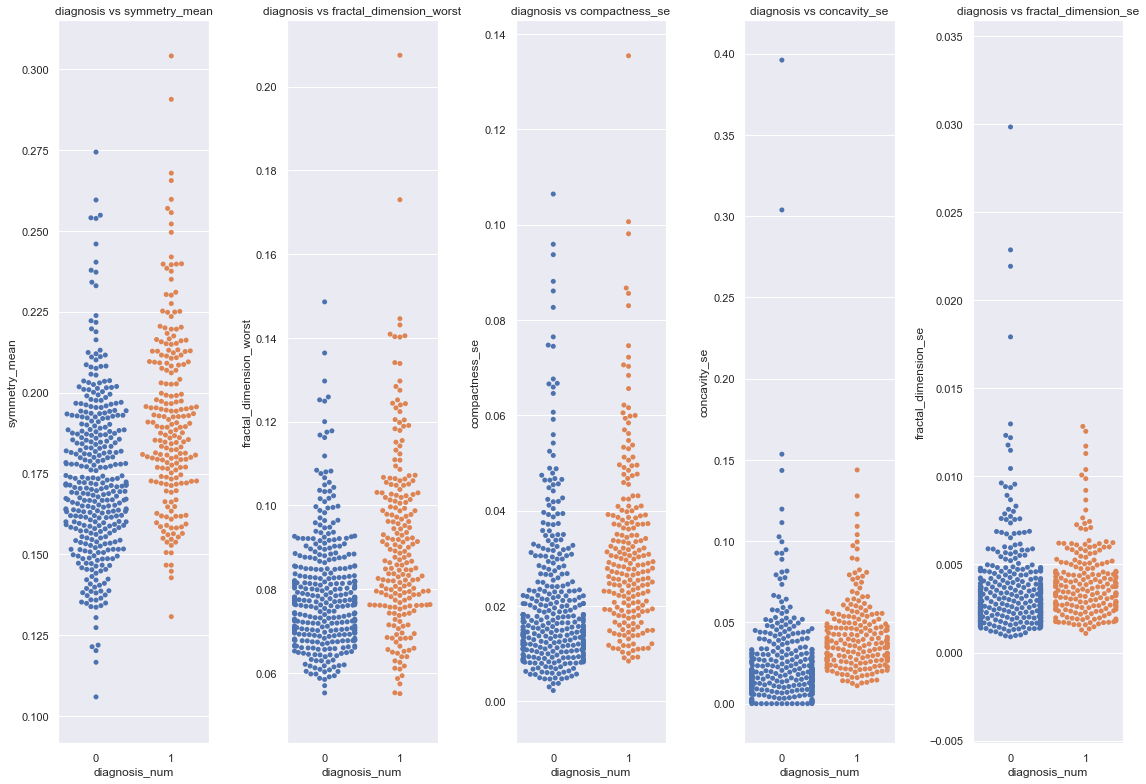

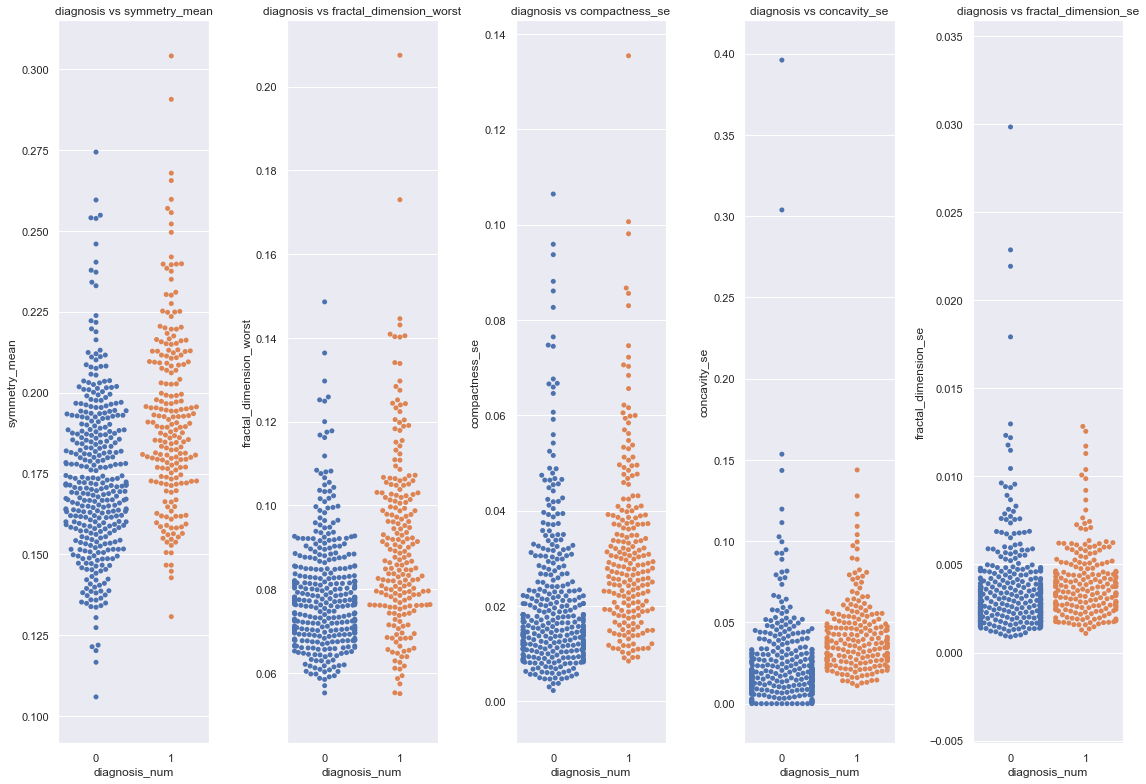

In [12]:
# Worst Features vs Diagnosis
fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))
axis_n = [axis1,axis2,axis3, axis4, axis5]
for feature, axis in zip(last_features[:4], axis_n):
    sns.swarmplot(x="diagnosis_num", y=feature, data=numeric_df, ax=axis)
    axis.set_title(f"diagnosis vs {feature}")
fig.tight_layout()
fig.savefig("images/worst_features_vs_diagnosis1.png")
#==================#

fig, (axis1,axis2,axis3, axis4, axis5) = plt.subplots(1,5,figsize=(16,11))
axis_n = [axis1,axis2,axis3, axis4, axis5]
for feature, axis in zip(last_features[5:], axis_n):
    sns.swarmplot(x="diagnosis_num", y=feature, data=numeric_df, ax=axis)
    axis.set_title(f"diagnosis vs {feature}")  
fig.tight_layout()
fig.savefig("images/worst_features_vs_diagnosis2.png")

# OVERSAMPLING VISUALIZATION

In [13]:
# spliting the data on train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (top_features, target, test_size = 0.30, random_state=21)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(398, 10) (398,)
(171, 10) (171,)


In [14]:
# Count the training data
total_count_tumors = len(y_train)
print(f'Total Tumors on train data = {total_count_tumors}')
total_count_benign = (y_train == 0).sum()
print(f'Total Benign Tumors on train data = {total_count_benign}')
total_count_malignant = (y_train == 1).sum()
print(f'Total Malignant Tumors on train data = {total_count_malignant}')
print("-----")
percent_benign = (total_count_benign/total_count_tumors)*100.00
percent_malignant = (total_count_malignant/total_count_tumors)*100.00
print(percent_benign)
print(percent_malignant)

Total Tumors on train data = 398
Total Benign Tumors on train data = 250
Total Malignant Tumors on train data = 148
-----
62.8140703517588
37.185929648241206


In [15]:
# import the over sampling models
# !pip install imbalanced-learn --upgrade

from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from collections import Counter
from sklearn.datasets import make_classification
print('Original train dataset shape %s' % Counter(y_train))

Using TensorFlow backend.


Original train dataset shape Counter({0: 250, 1: 148})


In [16]:
# Random Over Sampler Model
ros = RandomOverSampler(random_state=21)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled RandomOverSampler train dataset shape %s' % Counter(y_ros))
print (X_ros.shape, y_ros.shape)

Resampled RandomOverSampler train dataset shape Counter({0: 250, 1: 250})
(500, 10) (500,)


In [17]:
# SMOTE: Synthetic Minority Oversampling Technique Model
sm = SMOTE(random_state=21)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
print('Resampled SMOTE train dataset shape %s' % Counter(y_sm))
print (X_sm.shape, y_sm.shape)

Resampled SMOTE train dataset shape Counter({0: 250, 1: 250})
(500, 10) (500,)


In [18]:
# ADASYN: Adaptive Synthetic Sampling Model
ada = ADASYN(random_state=21)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Resampled ADASYN train dataset shape %s' % Counter(y_ada))
print (X_ada.shape, y_ada.shape)

Resampled ADASYN train dataset shape Counter({1: 254, 0: 250})
(504, 10) (504,)


In [19]:
# Scale the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_ada)
X_train_scaled = X_scaler.transform(X_ada)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\joaog\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


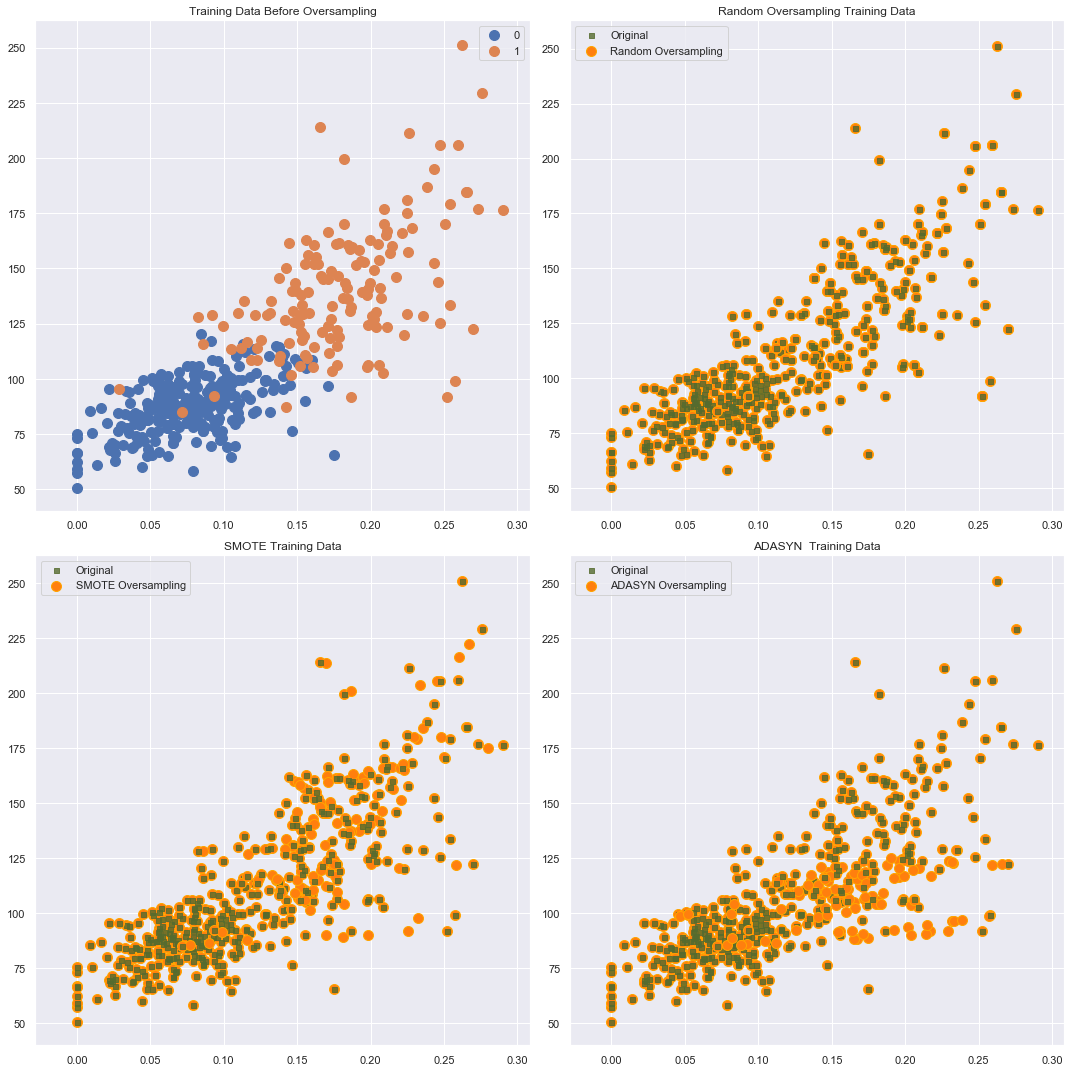

In [20]:
# scatter plot of examples by class label

fig = plt.figure(figsize=(15,15))
counter = Counter(y_ada)

axis1 = plt.subplot(221)
axis2 = plt.subplot(222)
axis3 = plt.subplot(223)
axis4 = plt.subplot(224)

for label, _ in counter.items():
    row_ix = where(y_train == label)[0]
    original = axis1.scatter(X_train.values[row_ix, 0], X_train.values[row_ix, 1], s=100)
    axis1.set_title("Training Data Before Oversampling")
    axis1.legend(counter)
#==========================================  
    row_ix_ros = where(y_ros == label)[0]
    ros_over = axis2.scatter(X_ros.values[row_ix_ros, 0], X_ros.values[row_ix_ros, 1], marker = "o", s=100, c="tab:orange",
                            edgecolors="orange")
    original1 = axis2.scatter(X_train.values[row_ix, 0], X_train.values[row_ix, 1], marker = "s",alpha=.8,
                             c="darkolivegreen",s=25)
    axis2.set_title("Random Oversampling Training Data")
    axis2.legend([original1, ros_over], ["Original", "Random Oversampling"])
#==========================================  
    row_ix_sm = where(y_sm == label)[0]
    SMOTE_over = axis3.scatter(X_sm.values[row_ix_sm, 0], X_sm.values[row_ix_sm, 1], marker = "o", s=100, c="tab:orange",
                            edgecolors="orange")
    original2 = axis3.scatter(X_train.values[row_ix, 0], X_train.values[row_ix, 1], marker = "s",alpha=.8,
                             c="darkolivegreen",s=25)
    axis3.set_title("SMOTE Training Data")
    axis3.legend([original2, SMOTE_over], ["Original", "SMOTE Oversampling"])
#==========================================  
    row_ix_ada = where(y_ada == label)[0]
    ADASYN_over = axis4.scatter(X_ada.values[row_ix_ada, 0], X_ada.values[row_ix_ada, 1], marker = "o", s=100, c="tab:orange",
                            edgecolors="orange")
    original3 = axis4.scatter(X_train.values[row_ix, 0], X_train.values[row_ix, 1], marker = "s",alpha=.8,
                             c="darkolivegreen",s=25)

    axis4.set_title("ADASYN  Training Data")
    axis4.legend([original3,ADASYN_over], ["Original", "ADASYN Oversampling"])

fig.tight_layout()
fig.savefig("images/oversampling_visualization.png")
fig.show()

# Models

### Model 1 - Logistic Regression

In [21]:
# import and train the model
from sklearn import linear_model

bestLogReg_model = linear_model.LogisticRegression(C=5, penalty="l2")
bestLogReg_model.fit(X_train_scaled, y_ada)
print(f"Best Logistic Regression Model Testing Data Score: {bestLogReg_model.score(X_test_scaled, y_test)}")

Best Logistic Regression Model Testing Data Score: 0.935672514619883


### Model 2 - SVC

In [22]:
# import, train and apply the model
from sklearn.svm import SVC 

bestSVC_model = SVC(C=100, kernel='rbf', gamma=0.005)
bestSVC_model.probability = True
bestSVC_model.fit(X_train_scaled, y_ada)
print(f"Best SVC Model Testing Data Score: {bestSVC_model.score(X_test_scaled, y_test)}")

Best SVC Model Testing Data Score: 0.9473684210526315


### Model 3 - Neural Network

In [23]:
# import, train and apply the model
from sklearn.neural_network import MLPClassifier

bestnn_model = MLPClassifier(activation= 'relu', hidden_layer_sizes= 20, solver= 'lbfgs')
bestnn_model.fit(X_train_scaled, y_ada)
print(f"Best Neural Network Model Testing Data Score: {bestnn_model.score(X_test_scaled, y_test)}")

Best Neural Network Model Testing Data Score: 0.9415204678362573


### Model 4 - Random Forest

In [24]:
# import the model 
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(max_depth=150, n_estimators=350)
best_rf.probability = True
best_rf.fit(X_train_scaled, y_ada)
print(f"Best RandomForest Model Testing Data Score: {best_rf.score(X_test_scaled, y_test)}")

Best RandomForest Model Testing Data Score: 0.9473684210526315


### Model 5 - Gradient Boost

In [25]:
# import the model 
from sklearn.ensemble import GradientBoostingClassifier

bestgrad_model = GradientBoostingClassifier(max_depth=3,n_estimators=350)
bestgrad_model.fit(X_train_scaled, y_ada)
print(f"Best GradientBoosting Model Testing Data Score: {bestgrad_model.score(X_test_scaled, y_test)}")

Best GradientBoosting Model Testing Data Score: 0.9415204678362573


In [26]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

clf1 = bestLogReg_model
clf2 = bestSVC_model
clf3 = bestnn_model
clf4 = best_rf
clf5 = bestgrad_model


from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4, clf5], weights=[2,2,2,2,1], refit=False)
eclf.fit(X_test_scaled, y_test)

print('Ensemble Model accuracy:', np.mean(y_test == eclf.predict(X_test_scaled))*100, "%")

Ensemble Model accuracy: 95.32163742690058 %


# Models - Visualizations

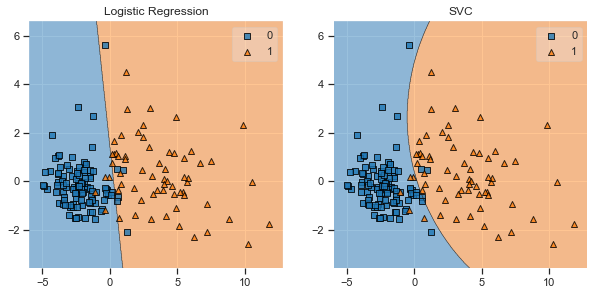

In [28]:
import itertools
clfs= [clf1, clf2, clf3, clf4,clf5, eclf]
labels_eclf = ["Logistic Regression", 'SVC', "Neural Network",'Random Forest', 'GradientBoosting', "Ensemble Model"]
pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(X_test_scaled)


gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10, 10))
for clf, lab, grd in zip(clfs[:2], labels_eclf[:2],
                         itertools.product([0,1,2],
                         repeat=2)):
    clf.fit(x_train2, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train2, y=y_test.values,
                                clf=clf)
    plt.title(lab)
plt.savefig("images/model_visualization1_LR_SVC.png")
plt.show()

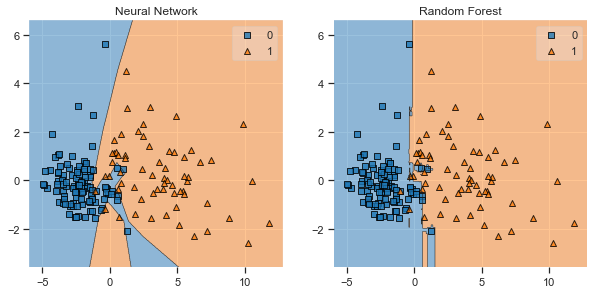

In [29]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10, 10))
for clf, lab, grd in zip(clfs[2:4], labels_eclf[2:4],
                         itertools.product([0,1,2],
                         repeat=2)):
    clf.fit(x_train2, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train2, y=y_test.values,
                                clf=clf)
    plt.title(lab)

plt.savefig("images/model_visualization2_NN_RF.png")
plt.show()

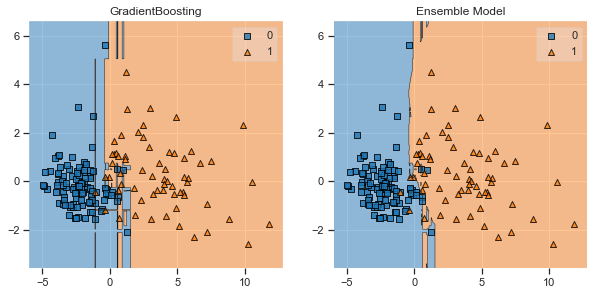

In [30]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10, 10))
for clf, lab, grd in zip(clfs[4:6], labels_eclf[4:6],
                         itertools.product([0,1,2],
                         repeat=2)):
    clf.fit(x_train2, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train2, y=y_test.values,
                                clf=clf)
    plt.title(lab)
    
plt.savefig("images/model_visualization3_GB_EM.png")
plt.show()